In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV file

In [2]:
file_path = 'ADANIPORTS.csv'
stock_data = pd.read_csv(file_path)

# Checking Null values in Stock_Data

<Axes: >

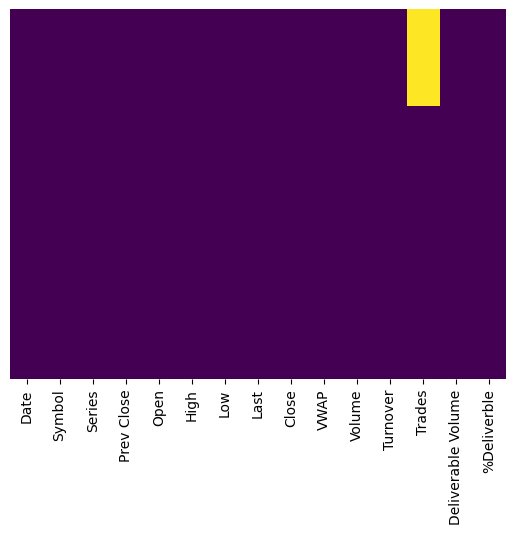

In [3]:
sns.heatmap(stock_data.isnull(), yticklabels=False, cbar=False, cmap='viridis' ) 

In [4]:
stock_data.describe()    # Quick Insides

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


# Convert the 'Date' column to datetime format

In [5]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort the data by date

In [6]:
stock_data = stock_data.sort_values('Date')

# Calculate 20-day and 50-day moving averages based on the 'Close' price

In [7]:
stock_data['20_MA'] = stock_data['Close'].rolling(window=20).mean()
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()

# Calculate daily returns (percentage change in closing price)

In [8]:
stock_data['Daily_Returns'] = stock_data['Close'].pct_change() * 100

# Plotting the Closing Prices and Moving Averages

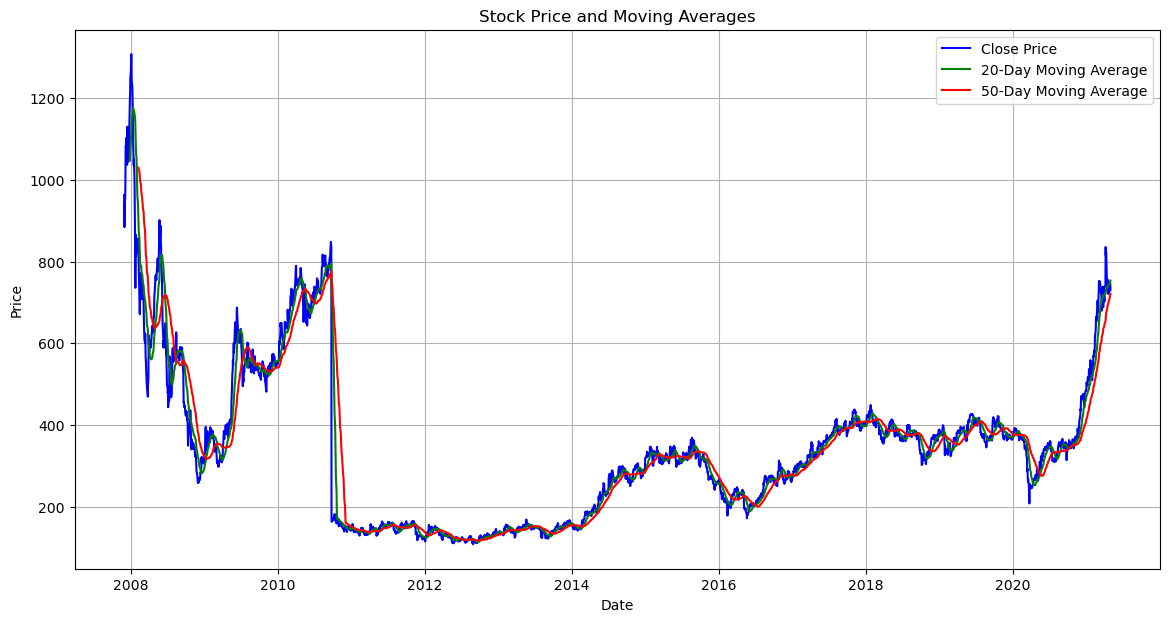

In [9]:

plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['Date'], stock_data['20_MA'], label='20-Day Moving Average', color='green')
plt.plot(stock_data['Date'], stock_data['50_MA'], label='50-Day Moving Average', color='red')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Daily Returns

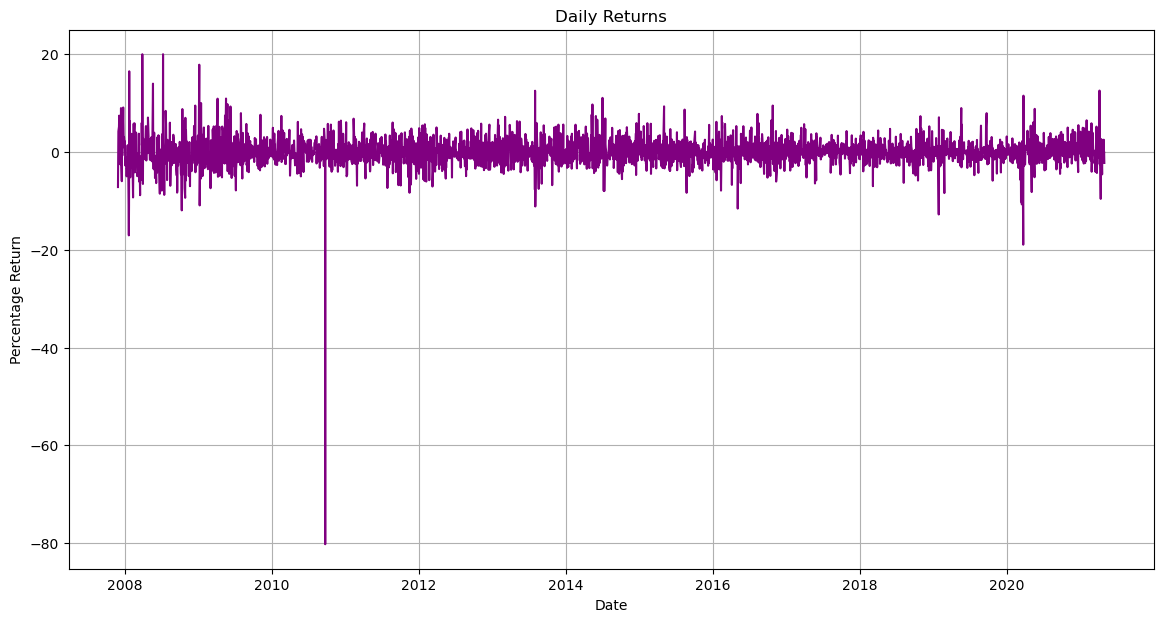

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['Daily_Returns'], label='Daily Returns', color='purple')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.grid(True)
plt.show()